In [839]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate

In [708]:
data_train = pd.read_csv('train.csv',encoding = "ISO-8859-1")
data_test = pd.read_csv('test.csv',encoding = "ISO-8859-1")
data_test_y = pd.read_csv('test_salaries.csv',encoding = "ISO-8859-1")
data_test['Salary'] = data_test_y['Salary']
data = data_train.merge(data_test, how='outer')
print(data_train.shape, data_test.shape, data.shape)
# data_test_y.head()

(612, 154) (262, 154) (874, 154)


### 1.Разведочный анализ данных

In [709]:
data.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [710]:
#Размер датасета
data.shape

(874, 154)

In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 873
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 1.0+ MB


In [712]:
#Колонки
for i in data.columns:
    print(i)

Salary
Born
City
Pr/St
Cntry
Nat
Ht
Wt
DftYr
DftRd
Ovrl
Hand
Last Name
First Name
Position
Team
GP
G
A
A1
A2
PTS
+/-
E+/-
PIM
Shifts
TOI
TOIX
TOI/GP
TOI/GP.1
TOI%
IPP%
SH%
SV%
PDO
F/60
A/60
Pct%
Diff
Diff/60
iCF
iCF.1
iFF
iSF
iSF.1
iSF.2
ixG
iSCF
iRB
iRS
iDS
sDist
sDist.1
Pass
iHF
iHF.1
iHA
iHDf
iMiss
iGVA
iTKA
iBLK
iGVA.1
iTKA.1
iBLK.1
BLK%
iFOW
iFOL
iFOW.1
iFOL.1
FO%
%FOT
dzFOW
dzFOL
nzFOW
nzFOL
ozFOW
ozFOL
FOW.Up
FOL.Up
FOW.Down
FOL.Down
FOW.Close
FOL.Close
OTG
1G
GWG
ENG
PSG
PSA
G.Bkhd
G.Dflct
G.Slap
G.Snap
G.Tip
G.Wrap
G.Wrst
CBar 
Post
Over
Wide
S.Bkhd
S.Dflct
S.Slap
S.Snap
S.Tip
S.Wrap
S.Wrst
iPenT
iPenD
iPENT
iPEND
iPenDf
NPD
Min
Maj
Match
Misc
Game
CF
CA
FF
FA
SF
SA
xGF
xGA
SCF
SCA
GF
GA
RBF
RBA
RSF
RSA
DSF
DSA
FOW
FOL
HF
HA
GVA
TKA
PENT
PEND
OPS
DPS
PS
OTOI
Grit
DAP
Pace
GS
GS/G


In [713]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Salary - 0
Born - 0
City - 0
Pr/St - 225
Cntry - 0
Nat - 0
Ht - 0
Wt - 0
DftYr - 125
DftRd - 125
Ovrl - 125
Hand - 0
Last Name - 0
First Name - 0
Position - 0
Team - 0
GP - 0
G - 0
A - 0
A1 - 0
A2 - 0
PTS - 0
+/- - 0
E+/- - 0
PIM - 0
Shifts - 0
TOI - 0
TOIX - 1
TOI/GP - 0
TOI/GP.1 - 0
TOI% - 1
IPP% - 1
SH% - 2
SV% - 1
PDO - 2
F/60 - 1
A/60 - 1
Pct% - 0
Diff - 0
Diff/60 - 1
iCF - 11
iCF.1 - 0
iFF - 11
iSF - 11
iSF.1 - 0
iSF.2 - 0
ixG - 1
iSCF - 1
iRB - 11
iRS - 1
iDS - 10
sDist - 0
sDist.1 - 25
Pass - 1
iHF - 0
iHF.1 - 1
iHA - 11
iHDf - 10
iMiss - 0
iGVA - 0
iTKA - 0
iBLK - 0
iGVA.1 - 1
iTKA.1 - 1
iBLK.1 - 1
BLK% - 1
iFOW - 0
iFOL - 0
iFOW.1 - 1
iFOL.1 - 1
FO% - 0
%FOT - 1
dzFOW - 0
dzFOL - 0
nzFOW - 0
nzFOL - 0
ozFOW - 0
ozFOL - 0
FOW.Up - 0
FOL.Up - 0
FOW.Down - 0
FOL.Down - 0
FOW.Close - 0
FOL.Close - 0
OTG - 0
1G - 0
GWG - 0
ENG - 0
PSG - 0
PSA - 0
G.Bkhd - 0
G.Dflct - 0
G.Slap - 0
G.Snap - 0
G.Tip - 0
G.Wrap - 0
G.Wrst - 0
CBar  - 0
Post - 0
Over - 0
Wide - 0
S.Bkhd - 0
S.Dflct - 0

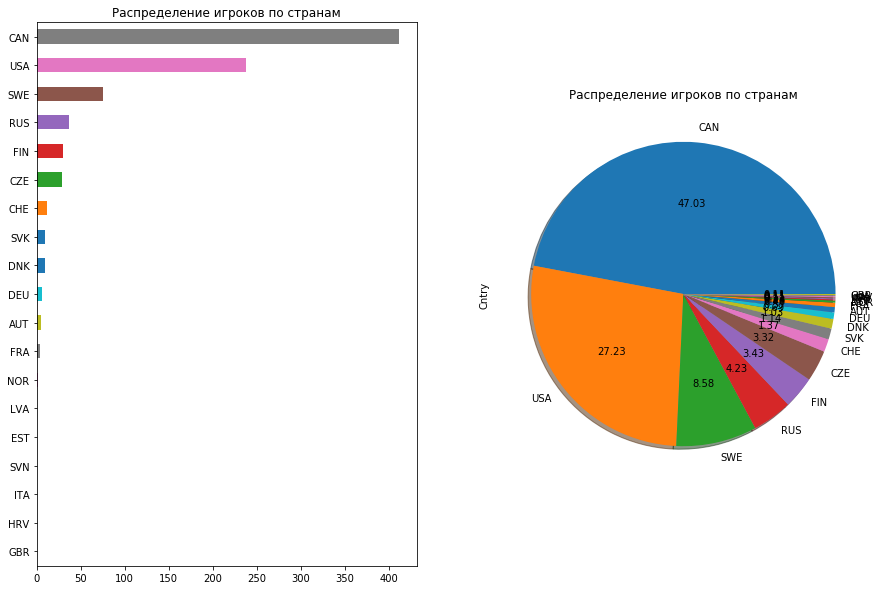

In [714]:
#
fig, ax=plt.subplots(1,2,figsize=(15,10))
data['Cntry'].value_counts().sort_values().plot(kind='barh',ax=ax[0]) 
ax[0].set_title("Распределение игроков по странам");
data['Cntry'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True,ax=ax[1]);
ax[1].set_title("Распределение игроков по странам");

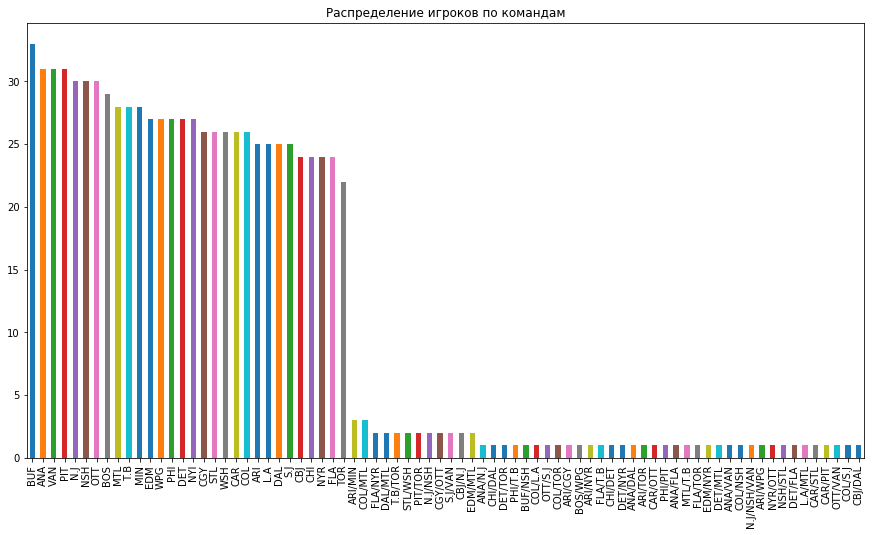

In [806]:
#Распределение игроков по командам
fig, ax=plt.subplots(1,1,figsize=(15,8))
data['Team'].value_counts().plot(kind='bar',ax=ax);
plt.title('Распределение игроков по командам');
#Видим,что число команд больше,чем есть(31) из-за того,что некоторые игроки меняли команду втечение сезона

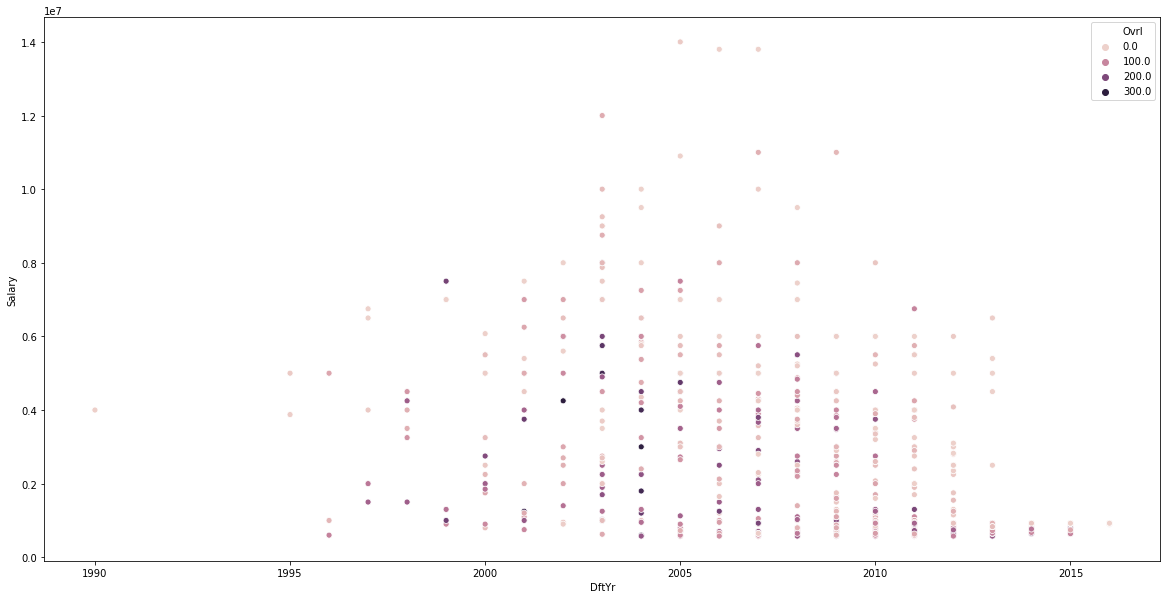

In [716]:
#Видим,что игроки,выбранные на драфте новичков в первом раунде получают наибольшие зарплаты)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.scatterplot(ax=ax, x='DftYr', y='Salary', data=data,hue='Ovrl')

C:\Users\MI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


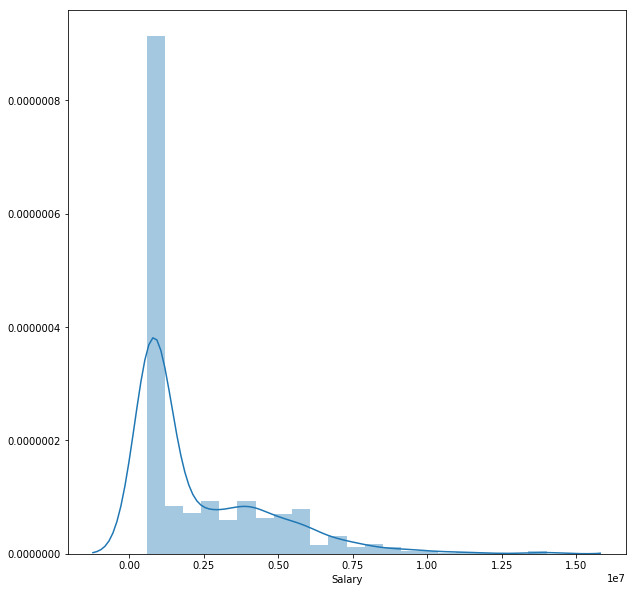

In [717]:
#Посмотрим на плотность вероятности рассеивания зарплаты
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Salary'])

### 2.1 Обработка данных.

In [718]:
for i in data.columns:
    print(i,data[i].dtype,data[i].isnull().sum())

Salary int64 0
Born object 0
City object 0
Pr/St object 225
Cntry object 0
Nat object 0
Ht int64 0
Wt int64 0
DftYr float64 125
DftRd float64 125
Ovrl float64 125
Hand object 0
Last Name object 0
First Name object 0
Position object 0
Team object 0
GP int64 0
G int64 0
A int64 0
A1 int64 0
A2 int64 0
PTS int64 0
+/- int64 0
E+/- float64 0
PIM int64 0
Shifts int64 0
TOI int64 0
TOIX float64 1
TOI/GP float64 0
TOI/GP.1 float64 0
TOI% float64 1
IPP% float64 1
SH% float64 2
SV% float64 1
PDO float64 2
F/60 float64 1
A/60 float64 1
Pct% float64 0
Diff int64 0
Diff/60 float64 1
iCF float64 11
iCF.1 int64 0
iFF float64 11
iSF float64 11
iSF.1 int64 0
iSF.2 int64 0
ixG float64 1
iSCF float64 1
iRB float64 11
iRS float64 1
iDS float64 10
sDist float64 0
sDist.1 float64 25
Pass float64 1
iHF int64 0
iHF.1 float64 1
iHA float64 11
iHDf float64 10
iMiss int64 0
iGVA int64 0
iTKA int64 0
iBLK int64 0
iGVA.1 float64 1
iTKA.1 float64 1
iBLK.1 float64 1
BLK% float64 1
iFOW int64 0
iFOL int64 0
iFOW.1 f

In [719]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
def check_num_cols():
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='float64' or dt=='int64'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

check_num_cols()
    

Колонка DftYr. Тип данных float64. Количество пустых значений 125, 14.3%.
Колонка DftRd. Тип данных float64. Количество пустых значений 125, 14.3%.
Колонка Ovrl. Тип данных float64. Количество пустых значений 125, 14.3%.
Колонка TOIX. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка TOI%. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка IPP%. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка SH%. Тип данных float64. Количество пустых значений 2, 0.23%.
Колонка SV%. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка PDO. Тип данных float64. Количество пустых значений 2, 0.23%.
Колонка F/60. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка A/60. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка Diff/60. Тип данных float64. Количество пустых значений 1, 0.11%.
Колонка iCF. Тип данных float64. Количество пустых значений 11, 1.26%.
Колонка iFF. Тип данных float64. Количество пустых значений 11, 1.26%

In [720]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
def correct_col(col):
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(data[[col]])
    imp_num = SimpleImputer(strategy='most_frequent')
    data[col] = imp_num.fit_transform(data[[col]])
    return data[col].isnull().sum()
correct_col("DftYr")

0

In [721]:
for col in data[num_cols].columns:
    correct_col(col)
    

In [722]:
cat_cols = []
def check_cat_cols():
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='object'):
            cat_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

check_cat_cols()
    

Колонка Pr/St. Тип данных object. Количество пустых значений 225, 25.74%.


In [723]:
#Данная колонка не несёт важной информации(уточняет место рождения),так что просто удалим её
data = data.drop(['Pr/St'], axis=1)

### 2.2 Кодирование категориальных признаков

In [724]:
obj_cols = data.select_dtypes('object')
obj_cols.head()

,Born,City,Cntry,Nat,Hand,Last Name,First Name,Position,Team
0,97-01-30,Sainte-Marie,CAN,CAN,L,Chabot,Thomas,D,OTT
1,93-12-21,Ottawa,CAN,CAN,R,Ceci,Cody,D,OTT
2,88-04-16,St. Paul,USA,USA,R,Okposo,Kyle,RW,BUF
3,92-01-07,Ottawa,CAN,CAN,R,Gudbranson,Erik,D,VAN
4,94-03-29,Toronto,CAN,CAN,R,Wilson,Tom,RW,WSH


In [725]:
#Поменяем формат Born на Dateime
obj_cols.drop(['Born'],axis=1,inplace=True)
data['Born'] = pd.to_datetime(data.Born,yearfirst=True)

C:\Users\MI\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [726]:
data.Cntry.unique()

array(['CAN', 'USA', 'SWE', 'CZE', 'CHE', 'FRA', 'DEU', 'SVK', 'RUS',
       'FIN', 'AUT', 'NOR', 'DNK', 'EST', 'LVA', 'ITA', 'HRV', 'GBR',
       'SVN'], dtype=object)

In [727]:
def encode_cat_data(x):
    x['Born'] = pd.to_datetime(x.Born, yearfirst=True)
    x['dowBorn'] = x.Born.dt.dayofweek
    x["doyBorn"] = x.Born.dt.dayofyear
    x["monBorn"] = x.Born.dt.month
    x['yrBorn'] = x.Born.dt.year
    x.drop(['First Name'], axis=1, inplace=True)
    ocols = ['City', 'Cntry', 'Nat', 'Last Name', 'Position', 'Team']
    for oc in ocols:
        temp = pd.get_dummies(x[oc])
        x = x.join(temp, rsuffix=str('_'+oc))
    x['Hand'] = pd.factorize(x.Hand)[0]
    x.drop(ocols, axis=1, inplace=True)
    x.drop(['Born'],axis=1,inplace=True)
    return x
encoded_data = encode_cat_data(data)

In [728]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
full_cs = ss.fit_transform(encoded_data)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 3.Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [729]:
features = data[num_cols].iloc[:,1:].columns.tolist()
target = data.iloc[:,0].name
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
xGF vs Salary,0.655334
SF vs Salary,0.650271
GF vs Salary,0.649783
CF vs Salary,0.649680
FF vs Salary,0.648430
SCF vs Salary,0.647427
FOW vs Salary,0.647162
FOL vs Salary,0.631629
GS vs Salary,0.621165
iCF vs Salary,0.617307


### 4.Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.

#### Используем r2 оценку,абсолютное отклоенение из-за большого колличества выбросов,а также среднюю абсолютную ошибку

### 5.Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.

### 6.Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [730]:
from sklearn.model_selection import train_test_split

In [731]:
X = encoded_data.drop(['Salary'], axis=1)
Y = encoded_data.Salary.values.reshape(-1,1)
ss_X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
ss_Y = pd.DataFrame(ss.fit_transform(Y),columns=['Salary'])


C:\Users\MI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [732]:
X_train,X_test,y_train,y_test = train_test_split(ss_X,ss_Y,random_state = 0)

#### KNN

In [816]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)


In [818]:
print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,knn_preds),mean_absolute_error(y_test,knn_preds),knn.score(X_test,y_test)))

Абсолютное отклоенение 0.48978261363477377,
Средняя абсолютная ошибка 0.6293620288044964,
R2 0.18165272550134426


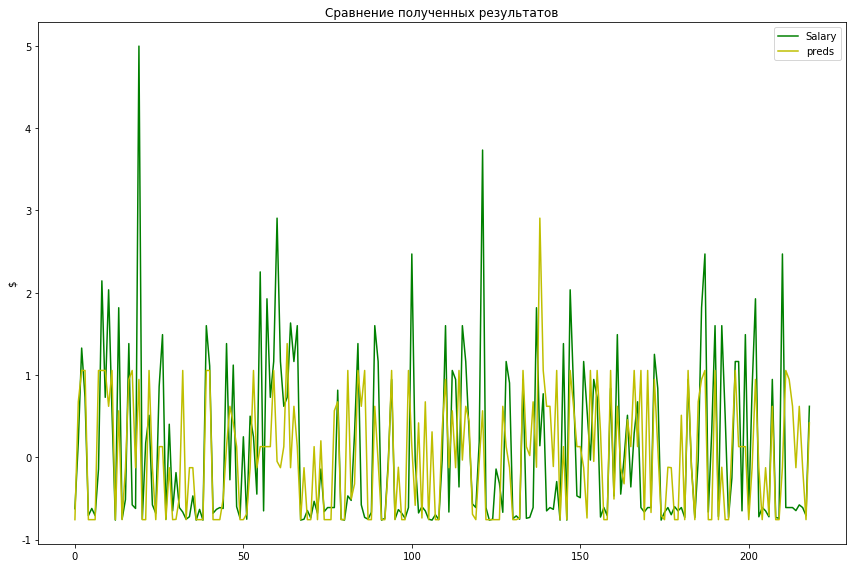

In [814]:
import matplotlib
def main_graf(y_preds):
    acts = {'Salary':pd.Series(y_test.Salary).values , 'preds': pd.Series(y_preds.reshape(1,-1)[0]).values}
    acts_df = pd.DataFrame(data=acts,index = [i for i in range(y_test.shape[0])])
    fig, ax=plt.subplots(1,1,figsize=(12,8))
    acts_df.plot(ax=ax, style=['g-','y-']);
    plt.title("Сравнение полученных результатов");
    plt.ylabel('$');
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout()
    
main_graf(knn_preds)

#### Линейная регрессия

In [736]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [815]:
lr = LinearRegression()
lr.fit(X_train, y_train)
reg_pred  = lr.predict(X_test)
print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,reg_pred),mean_absolute_error(y_test,reg_pred),lr.score(X_test,y_test)))

Абсолютное отклоенение 0.4550376692925461,
Средняя абсолютная ошибка 0.5747193407824694,
R2 0.4205550311076781


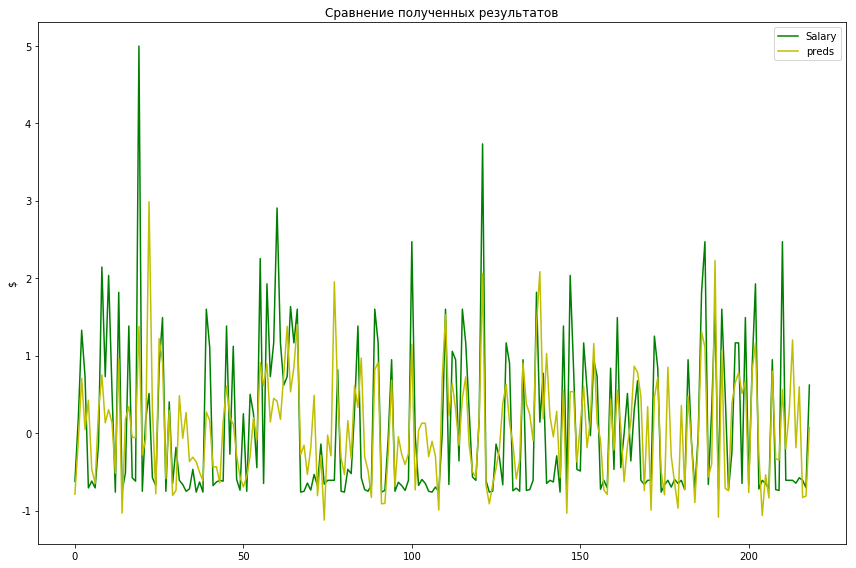

In [754]:
main_graf(reg_pred)

#### Метод опорных векторов

In [755]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

In [819]:
LSVR = LinearSVR(C=1.0, max_iter=10000)
LSVR.fit(X_train, y_train)
LSVR_preds = LSVR.predict(X_test)
print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,LSVR_preds),mean_absolute_error(y_test,LSVR_preds),LSVR.score(X_test,y_test)))

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Абсолютное отклоенение 0.4566592780925801,
Средняя абсолютная ошибка 0.5714060961721591,
R2 0.42923481376095995


In [836]:
scores = cross_val_score(LinearSVR(C=1.0, max_iter=10000), 
                         X_train, y_train, cv=3)
print("Кросс валидация {}".format(scores))

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Кросс валидация [0.45051538 0.53771067 0.53485334]


C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Подбор гиперпарметра

In [744]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [745]:
n_range = np.array(range(10000,100000,10000))
tuned_parameters = [{'max_iter': n_range}]
tuned_parameters

[{'max_iter': array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])}]

In [746]:
clf_gs = GridSearchCV(LinearSVR(), tuned_parameters)
clf_gs.fit(X_train, y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_iter': array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [747]:
clf_gs.best_params_

{'max_iter': 60000}

In [831]:
LSVR = LinearSVR(C=1.0, max_iter=100)
LSVR.fit(X_train, y_train)
LSVR_preds = LSVR.predict(X_test)


C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [832]:
print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,LSVR_preds),mean_absolute_error(y_test,LSVR_preds),LSVR_n.score(X_test,y_test)))

Абсолютное отклоенение 0.45607644637597244,
Средняя абсолютная ошибка 0.571367156541018,
R2 0.4292247351276387


#### RandomForest

In [787]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [795]:
forest = RandomForestRegressor(n_estimators=1000,
                              random_state=0)

In [796]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_

C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [797]:
fi_df = pd.DataFrame( 100*forest.feature_importances_/forest.feature_importances_.max(), 
                      index=X.columns, #mod.feature_name(),
                      columns =['importance'])

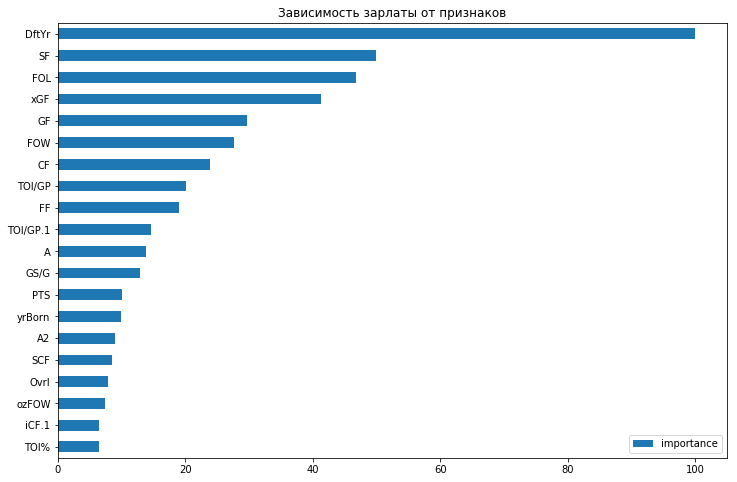

In [798]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
fi_df.sort_values(by='importance',ascending=True).iloc[-20:].plot(kind='barh', color='C0', ax=ax)
plt.title("Зависимость зарлаты от признаков");

In [799]:
for_pred = forest.predict(X_test)


In [837]:
print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,for_pred),mean_absolute_error(y_test,for_pred),forest.score(X_test,y_test)))
scores = cross_val_score(RandomForestRegressor(n_estimators=1000,
                              random_state=0), 
                         X_train, y_train, cv=3)
print("Кросс валидация {}".format(scores))

Абсолютное отклоенение 0.24682758074995628,
Средняя абсолютная ошибка 0.3922467465128869,
R2 0.6519303295869732


C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Кросс валидация [0.55675209 0.66114449 0.66477189]


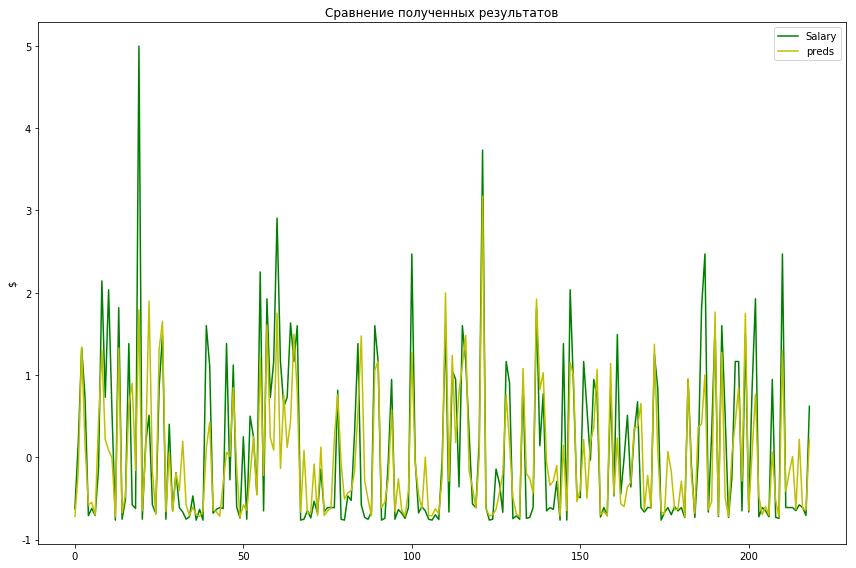

In [763]:
main_graf(for_pred)

In [764]:
!pip install xgboost
    

In [679]:
import xgboost as xgb

In [686]:
opt_xgb_params = {'colsample_bytree': 0.9,
				'learning_rate': 0.1,
				'max_depth': 7,
				'min_child_weight': 30,
				'n_estimators': 10000,
				'nthread': -1,
				'objective': 'reg:linear',
				'reg_lambda': 1.0}


opt_XGBoost_reg = xgb.XGBRegressor(**opt_xgb_params)

opt_XGBoost_reg.fit(X_train, y_train)



[22:40:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=30, missing=None, n_estimators=10000,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [840]:
xgb_pred = opt_XGBoost_reg.predict(X_test)

print("Абсолютное отклоенение {},\nСредняя абсолютная ошибка {},\nR2 {}"
      .format(median_absolute_error(y_test,xgb_pred),mean_absolute_error(y_test,xgb_pred),opt_XGBoost_reg.score(X_test,y_test)))
scores = cross_val_score(xgb.XGBRegressor(**opt_xgb_params), 
                         X_train, y_train, cv=3)
print("Кросс валидация {}".format(scores))

Абсолютное отклоенение 0.24551026151311503,
Средняя абсолютная ошибка 0.4263826175319027,
R2 0.5870730119081038
[01:05:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Кросс валидация [0.56872351 0.56688483 0.65715187]


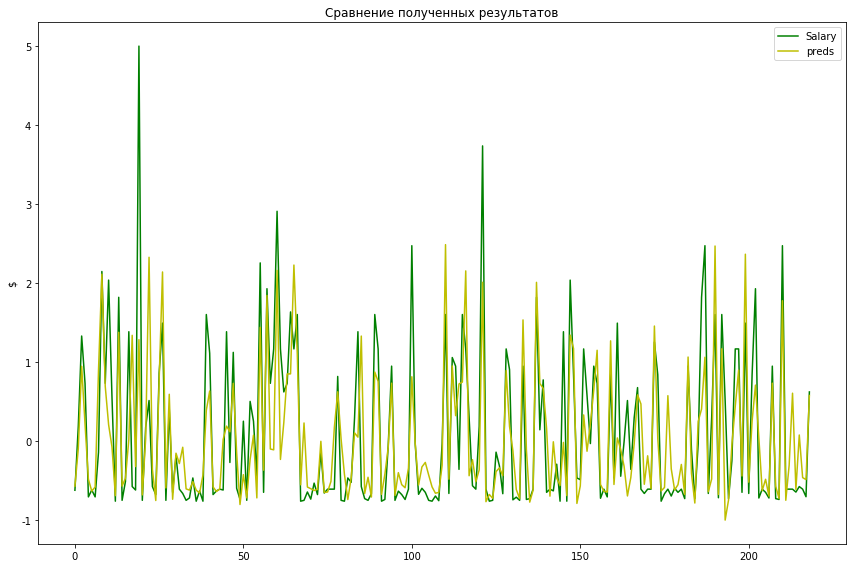

In [838]:
main_graf(xgb_pred)

#### Подбор гиперпараметра

In [803]:
n_range = np.array(range(10000,100000,10000))
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])}]

In [804]:
clf_gs = GridSearchCV(xgb.XGBRegressor(), tuned_parameters)
clf_gs.fit(X_train, y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[23:20:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:34:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [ ]:
clf_gs.best_params_